In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

- Import data.

In [43]:
df = pd.read_csv('data/explored_cmv&unpop_data')

In [44]:
df.drop(columns = 'Unnamed: 0', inplace = True)

- Load models.

In [45]:
rf_f1 = pickle.load(open('models/RandomForest.sav', 'rb'))

In [46]:
rf_rocauc = pickle.load(open('models/RandomForest_rocauc.sav', 'rb'))

In [47]:
dtree_f1 = pickle.load(open('models/DecisionTree.sav', 'rb'))

In [48]:
dtree_rocauc = pickle.load(open('models/DecisionTree_rocauc.sav', 'rb'))

In [49]:
et_f1 = pickle.load(open('models/ExtraTrees.sav', 'rb'))

In [50]:
et_rocauc = pickle.load(open('models/ExtraTrees_rocauc.sav', 'rb'))

In [51]:
xgb_f1 = pickle.load(open('models/XGBoost.sav', 'rb'))

In [52]:
xgb_rocauc = pickle.load(open('models/XGBoost_rocauc.sav', 'rb'))

In [53]:
logreg_f1 = pickle.load(open('models/LogisticRegression.sav', 'rb'))

In [54]:
logreg_rocauc = pickle.load(open('models/LogisticRegression_rocauc.sav', 'rb'))

In [55]:
models = {'dtree_f1': dtree_f1, 'dtree_rocauc': dtree_rocauc, 'rf_f1': rf_f1, 'rf_rocauc': rf_rocauc, 
         'et_f1': et_f1, 'et_rocauc': et_rocauc, 'xgb_f1': xgb_f1, 'xgb_rocauc': xgb_rocauc, 
         'logreg_f1': logreg_f1, 'logreg_rocauc': logreg_rocauc}

- Recreate train/test split.

In [56]:
x_list = df.select_dtypes(exclude = np.dtype('O')).columns.tolist()
x_list.remove('post_subreddit')
X = df[x_list]
y = df['post_subreddit']

X = X.astype(np.dtype('float64'))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

- Score models.

In [60]:
model_scores = {}

for name, model in models.items():
    preds = model.predict(X_test)
    model_scores[name] = {}
    
    model_scores[name]['test_f1'] = f1_score(y_test, preds)
    model_scores[name]['test_accuracy'] = accuracy_score(y_test, preds)
    model_scores[name]['test_roc_auc'] = roc_auc_score(y_test, preds)
    
    preds = model.predict(X_train)
    
    model_scores[name]['train_f1'] = f1_score(y_train, preds)
    model_scores[name]['train_accuracy'] = accuracy_score(y_train, preds)
    model_scores[name]['train_roc_auc'] = roc_auc_score(y_train, preds)

C:\Users\Avanyali\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Avanyali\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Avanyali\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Avanyali\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consum

In [61]:
model_frame = pd.DataFrame(model_scores)

In [62]:
model_frame

,dtree_f1,dtree_rocauc,rf_f1,rf_rocauc,et_f1,et_rocauc,xgb_f1,xgb_rocauc,logreg_f1,logreg_rocauc
test_f1,0.000000,0.000000,0.779079,0.000000,0.000000,0.704639,0.824791,0.826855,0.792529,0.791514
test_accuracy,0.563230,0.563230,0.818557,0.563230,0.563230,0.779038,0.848454,0.848454,0.824399,0.824399
test_roc_auc,0.500000,0.500000,0.808895,0.500000,0.500000,0.759327,0.844887,0.846211,0.818056,0.817526
train_f1,0.000000,0.000000,0.776811,0.000000,0.000000,0.699954,0.994599,0.994992,0.816271,0.804727
train_accuracy,0.563345,0.563345,0.817869,0.563345,0.563345,0.774227,0.995304,0.995647,0.844788,0.837228
train_roc_auc,0.500000,0.500000,0.807524,0.500000,0.500000,0.754984,0.994740,0.995045,0.838584,0.829455


In [41]:
model_frame.drop(columns = ['dtree_f1', 'dtree_rocauc', 'rf_rocauc', 'et_f1'], inplace = True)

In [42]:
model_frame

,rf_f1,et_rocauc,xgb_f1,xgb_rocauc,logreg_f1,logreg_rocauc
f1,0.779079,0.704639,0.824791,0.826855,0.792529,0.791514
accuracy,0.818557,0.779038,0.848454,0.848454,0.824399,0.824399
roc_auc,0.808895,0.759327,0.844887,0.846211,0.818056,0.817526


- From these we can select only the models that are above baseline accuracy (.56323), ruling out 4 of our 10 models. Some overfitting for XGBoost models, but strong enough on test that I will disregard it.
- Selecting two from above for analysis, I select logreg_rocauc and xgb_rocauc. XGB because of all the tree models, it performed the best on test data, and Logistic Regression because I seek inferential power beyond a tree's feature selection. ROC AUC is my selected metric because I want models that are capable of differentiating the targets for inferential purposes.

In [21]:
pickle.dump(model_frame, open('models/model_scores.sav', 'wb'))

- Plot XGBoost model features.

In [22]:
def zip_and_sort_features(values):
    zipped = zip(x_list, values)
    features_dict = {entry[0]: entry[1] for entry in zipped}
    #credit to: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    features_dict_sorted = {k: v for k, v in sorted(features_dict.items(), key=lambda item: item[1], reverse = True)}
    return features_dict_sorted

In [25]:
xgb_rocauc_features_dict_sorted = zip_and_sort_features(xgb_rocauc.feature_importances_)

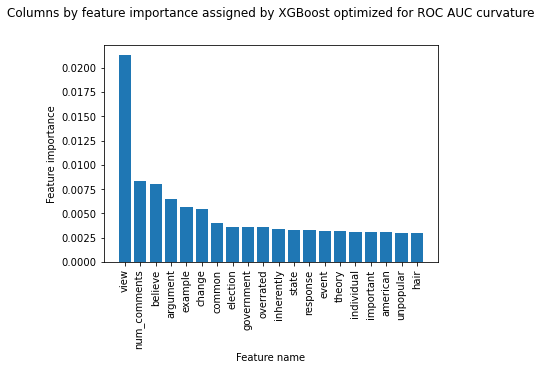

In [26]:
keys = list(xgb_rocauc_features_dict_sorted.keys())
values = list(xgb_rocauc_features_dict_sorted.values())

plt.bar(keys[:20], values[:20])
plt.xticks(rotation = 90)
plt.title("Columns by feature importance assigned by XGBoost optimized for ROC AUC curvature", y= 1.1)
plt.ylabel("Feature importance")
plt.xlabel("Feature name")
plt.savefig('images/xgb_rocauc.png', bbox_inches = 'tight', pad_inches = .3)

- A notable amount of what I would call 'debate' language and political language. Given the politeness of debate language when compared to the hyperbolic nature of Unpopular Opinion, it seems likely that these are features that identify Change my View.

- Plot Logistic Regression model features.

In [35]:
logreg_rocauc_features_dict_sorted = zip_and_sort_features(logreg_rocauc.coef_[0])

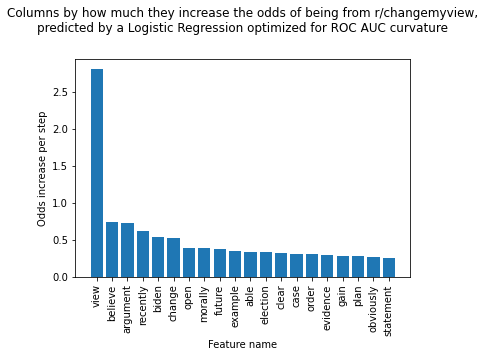

In [36]:
keys = list(logreg_rocauc_features_dict_sorted.keys())
values = [math.exp(val) - 1 for val in list(logreg_rocauc_features_dict_sorted.values())]

plt.bar(keys[:20], values[:20])
plt.xticks(rotation = 90)
plt.title("Columns by how much they increase the odds of being from r/changemyview,\npredicted by a Logistic Regression optimized for ROC AUC curvature", y= 1.1)
plt.ylabel("Odds increase per step")
plt.xlabel("Feature name")
plt.savefig('images/logreg_rocauc_pos_odds.png', bbox_inches = 'tight', pad_inches = .3)

- The above hypothesis is confirmed here. "Believe", "argument", "evidence", etc. are all formal disagreement language. Some additional confirmation that political events are relevant to the subreddit as well.

In [37]:
logreg_rocauc_features_dict_sorted = zip_and_sort_features(logreg_rocauc.coef_[0])

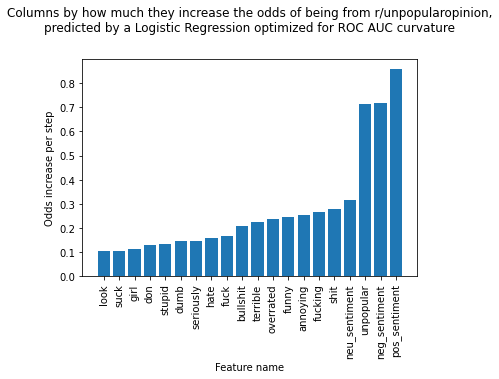

In [38]:
keys = list(logreg_rocauc_features_dict_sorted.keys())
values = [-1 * (math.exp(val) - 1) for val in list(logreg_rocauc_features_dict_sorted.values())]

plt.bar(keys[len(keys) - 20:], values[len(values) - 20:])
plt.xticks(rotation = 90)
plt.title("Columns by how much they increase the odds of being from r/unpopularopinion,\npredicted by a Logistic Regression optimized for ROC AUC curvature", y= 1.1)
plt.ylabel("Odds increase per step")
plt.xlabel("Feature name")
plt.savefig('images/logreg_rocauc_neg_odds.png', bbox_inches = 'tight', pad_inches = .3)

- Similar to what was found in EDA, the Logistic Regression shows that almost all hyperbolic negative adjectives ('hate', 'bullshit', etc.) identify Unpopular Opinion. All sentiment scores are included here, indicating that the more extreme spread of sentiment overall helps identify Unpopular Opinion posts.

***Conclusions***

- Overall, it appears that Unpopular Opinion is a good target forum for a demo of astroturf marketing. Denigrating things is very common there, which would make the goal of generating negative public sentiment for our clientele’s competing products simple to add to the mix. Additionally, inserting a promotion for our clientele's product in the text statement of a reddit post would not appear to be amiss.
- Change my View does not appear to have many characteristics that would make it a useful staging ground for a demo. There is a focus on geopolitical or societal issues, with little chance of making a stand for a clientele’s product without being seen as clear advertising. 
- I propose the company move forward with a demo for our clients on the Unpopular Opinion subreddit.


***Executive Summary***

- [FAKE MEDIA GROUP] is one of the fastest growing companies on the market. You have original, interesting content all over your network. The problem is getting more users to keep that growth sustained.

- As you are well aware, it can be difficult to get into the advertising space. Many consumers will simply ignore an advertisement out of hand, and without careful study of psychological tricks and tactics none of your ad will remain in their head. You need a way to create brand awareness and positive sentiment without treading on consumers delicate (metaphorical) toes.

- The solution? Astroturf marketing. With the right training, and employee or chat bot can guide users toward your brand without their awareness that they are being advertised to. It's cheaper than buying airtime, can be picked up by real grassroots attention, and can be used to create negative public sentiment towards the competition. We can keep you informed on the latest trends in language and speech patterns on various fora so that you can do the advertising your company needs.

- We have multiple machine learning models ready to show you that describe exactly what makes an individual post on a particular forum look like the others around it. Through hours of testing and analysis, we can give you the tools to convince potential users that your advertisements are just normal forum posts.

- If you're ready, we'd love to take you on as our client. [FAKE MEDIA GROUP] represents a load of loveable media that we want to see flourish in today's market. With the right tools in your hands, we're sure that you can make that happen.